# Dados e Aprendizagem Automática, MEI/MIEInf, Uminho 2021


Import all dependencies we'll be needing

In [1]:
import numpy
import pandas
import seaborn
from dateutil import parser
from matplotlib import pyplot

# Análise de Dados

De modo a podermos aplicar corretamente um modelo de machine learning é necessário primeiro analisar e 'limpar' o dataset que nos foi providenciado pelos docentes.
Este dataset contém dados relativos ao tráfego na cidade do Porto durante um certo período de tempo. Os atributos que podemos encontrar são:

- city_name: nome da cidade (Porto)

- record_date: uma timestamp "yyyy-mm-dd HH:MM:SS" associada a uma medição. Este atributo poderá vir a ser transformado de modo a retirar dados úteis.

- average_speed_diff: Valor que indica o trânsito que se encontra de momento na cidade. É a diferença entre a velocidade máxima expectável e a velocidade que foi medida. Valores altos indicam uma maior diferença e, por conseguinte, uma quantidade de tráfego bastante maior.

- average_free_flow_speed: Valor que indica a velocidade máxima expectável para um veículo numa situação sem trânsito. 

- average_time_diff: Valor que indica a diferença entre o tempo esperado para percorrer um determinado trajeto contra o tempo registado que demorou a fazer o trajeto em questão.

- average_free_flow_time: Valor que indica a quantidade de tempo esperada para um veículo efetuar um trajeto.

- luminosity: Nível qualitativo de luminosidade que se verificava na zona e record_date de medição.

- average_temperature: Valor médio da temperatura na zona e record_date de medição.

- average_atmosp_pressure: Valor médio da pressão atmosférica na zona e record_date de medição.

- average_humidity: Valor médio da humidade atmosférica na zona e record_date de medição.

- average_wind_speed: Valor médio da velocidade do vento na zona e record_date de medição.

- average_cloudiness: Valor qualitativo das condições atmosféricas na zona e record_date de medição.

- average_precipitation: Valor médio da precipitação na zona e record_date de medição.

- average_rain: Valor qualitativo da precipitação na zona e record_date de medição.

### Objetivo

Com base na análise do dataset podemos concluir que o atributo que necessitamos de utilizar para que o nosso modelo seja capaz de prever a intensidade de trânsito é 'average_speed_diff'.

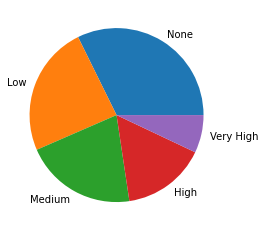

Distribuição percentual de average_speed_diff.
None         32.295948
Medium       24.236641
Low          20.830887
High         15.604815
Very High     7.031709
Name: average_speed_diff, dtype: float64


In [2]:
testing = pandas.read_csv('../dataset/training_data.csv', encoding='iso-8859-1', dtype={'AVERAGE_CLOUDINESS' : str}, keep_default_na=False)
testing.columns = testing.columns.str.lower()

testing['average_speed_diff'] = testing['average_speed_diff'].map({'None':0, 'Low':1, 'Medium':2, 'High':3, 'Very_High':4})

percentage_distribution = testing['average_speed_diff'].value_counts(normalize=True) * 100
labels = ['None', 'Low', 'Medium', 'High', 'Very High']
pyplot.pie(percentage_distribution, labels=labels)
pyplot.show()

print('Distribuição percentual de average_speed_diff.')
percentage_distribution.index = percentage_distribution.index.map({0: 'None', 1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'})
print(percentage_distribution)

# Análise average_speed_diff

Como podemos verificar no gráfico e dados acima uma grande parte das medições (32.295948%) são do tipo 'None' o que pode indicar as horas noturnas e madrugada em que o trânsito é praticamente nulo. Por sua vez 'Very High' apresenta uma percentagem reduzida, talvez indicando horas críticas durante o dia, como a hora de ponta.


# Análise de record_date

O atributo record_date pode ser expandido para providenciar dados mais úteis. Dado a hipótese colocada durante a análise de average_speed_diff podemos expandir record_date para os seguintes atributos. 'month' que nos providencia com as diferenças de average_speed_diff ao longo do ano. 'week_day' providencia a diferença de average_speed_diff ao longo dos dias da semana. Espera-se que alguns dias tenham uma average_speed_diff Very_High de manhã cedo o que confirma a hipótese da hora de ponta. Por fim decidimos ainda explicitar 'hour' para melhor analisar e prever o tráfego ao longo do dia.

In [3]:
testing['record_date'] = testing.record_date.map(lambda x : parser.parse(x))
testing['week_day'] = testing.record_date.map(lambda x : x.weekday())
testing['month'] = testing.record_date.map(lambda x : x.month)
testing['hour'] = testing.record_date.map(lambda x : x.hour)

print(testing[['week_day', 'month', 'hour']])

      week_day  month  hour
0            3      8     7
1            4      8    14
2            6      9    16
3            1      2    11
4            3      6    12
...        ...    ...   ...
6807         5      2     9
6808         5      6    18
6809         1     10     4
6810         2      1     1
6811         5      6    21

[6812 rows x 3 columns]


# Missing Values

Missing values são uns dos problemas mais comuns que se pode encontrar durante a fase da preparação de dataset. Um dos motivos para isto acontecer, é por exemplo, o erro humano, ou questões de privacidade, entre outros. Independentemente da razão, estes missing values afetam o desempenho dos modelos. Pudemos verificar que existiam valores em falta nos atributos 'average_cloudiness' e 'average_rain'. Existindo várias maneiras de conseguirmos corrigir estes valores, nós optamos por substituir os valores em falta por 'NULL'.

In [4]:
testing['average_cloudiness'] = testing['average_cloudiness'].map({'NULL':0, 'cï¿½u limpo':1, 'nuvens quebradas':2, 'tempo nublado':3, 'nublado':3})
avg_cld = testing['average_cloudiness'].value_counts(normalize=True) * 100
print(avg_cld)

testing['average_rain'] = testing['average_rain'].map({'NULL':0, 'chuvisco fraco':1, 'chuvisco e chuva fraca':2, 'chuva fraca':2, 'chuva leve':2, 'aguaceiros fracos':2, 'chuva':3, 'aguaceiros':3, 'chuva moderada': 4, 'chuva forte': 5, 
 'chuva de intensidade pesado': 5, 'chuva de intensidade pesada': 5, 'trovoada com chuva leve': 6, 'trovoada com chuva': 7})
testing['average_rain'] = testing['average_rain'].map(lambda x: 0 if (x == 'NULL' or x == '')  else x )
avg_rain = testing['average_rain'].value_counts(normalize=True) * 100
print(avg_rain)

0.0    57.186358
2.0    25.334957
1.0     9.317905
3.0     8.160780
Name: average_cloudiness, dtype: float64
0.0    86.524653
2.0     8.257539
4.0     3.662039
3.0     0.981331
5.0     0.263284
6.0     0.167544
1.0     0.119674
7.0     0.023935
Name: average_rain, dtype: float64


# Análise de average_precipitation

Conseguimos ainda verificar que o atributo 'average_precipitation' apresenta todos os seus valores a '0.0'. O seguinte gráfico evidencia isto.
Visto que este atributo não irá contribuir para o modelo decidimos removê-lo. 

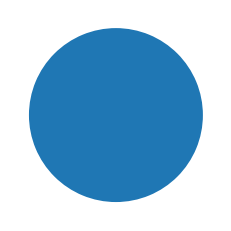

In [5]:
avg_precipitation = testing['average_precipitation'].value_counts(normalize=True) * 100
pyplot.pie(avg_precipitation)
pyplot.show()

# Análise de Luminosity

A luminosidade é um fator que afeta a segurança de condução e, por consequência, a velocidade máxima aconselhada. Desta forma achamos que este atributo deveria ser incluído no modelo que iremos criar. Para podermos utilizar os valores deste atributo aplicamos um map que troca os valores {'DARK', 'LOW_LIGHT', 'LIGHT'} por {0, 1, 2}, respetivamente.


In [6]:
testing['luminosity'] = testing['luminosity'].map({'DARK': 0, 'LOW_LIGHT': 1, 'LIGHT': 2})


# Velocidade e Tempo.

Como sabemos de Física velocidade = distância / tempo. Notamos então que dos atributos atualmente disponíveis falta uma das grandezas da fórmula. De momento possuímos, average_speed_diff, average_free_flow_speed, average_time_diff, average_free_flow_time. Falta-nos então a distância que é facilmente obtida por manipulação da fórmula.


Podemos voltar a visitar esta parte mais tarde de modo a obter dados mais precisos para aumentar o desempenho do nosso modelo.

In [7]:
# V = d/t <=> d = V * t (60 segundos e 60 minutos visto estarmos a trabalhar com valores horários)
testing['distance'] = testing["average_free_flow_speed"] * testing["average_free_flow_time"] / 3.6 # 60 * 60 / 1000

testing['average_speed'] = testing['distance'] / testing["average_free_flow_time"]

# Design de uma class para processamento de dados

Graças à análise do dataset e necessidade de aplicar processamento ao dataset de testes conseguimos chegar à seguinte class.

Esta class irá dar load dos datasets e evitar a duplicação de código mais tarde.


In [8]:
class TrafficData:
    def process(filename, encoding) -> pandas.DataFrame:
        # Load the csv files
        data = pandas.read_csv('../dataset/' + filename, encoding=encoding, keep_default_na=False)
        # Fix the column names to lower case.
        data.columns = data.columns.str.lower()

        # Parse the record_date column into a friendlier format       
        # Afterwards retrieve week_day, month and hour
        data['record_date'] = data.record_date.map(lambda x : parser.parse(x))
        data['week_day'] = data.record_date.map(lambda x : x.weekday())
        data['month'] = data.record_date.map(lambda x : x.month)
        data['hour'] = data.record_date.map(lambda x : x.hour)
        # record_date is no longer needed.
        data.drop('record_date', inplace=True, axis=1)

        # Process the columns that have qualitative values in strings. 
        # We need these as integers to later on feed the NN.
        data.luminosity = data.luminosity.map({'DARK': 0, 'LOW_LIGHT': 1, 'LIGHT': 2})
        if 'average_speed_diff' in data.columns:
            data.average_speed_diff = data.average_speed_diff.map({'None':0, 'Low':1, 'Medium':2, 'High':3, 'Very_High':4})
        # :)
        data.average_cloudiness = data.average_cloudiness.map({'NULL':0, 'cï¿½u limpo':1, 'nuvens quebradas':2, 'tempo nublado':3, 'nublado':3})
        data['average_cloudiness'].fillna(0, inplace=True)
        data['average_rain'].fillna(0, inplace=True)

        # :))
        data.average_rain = data.average_rain.map({'NULL':0, 'chuvisco fraco':1, 'chuvisco e chuva fraca':2, 'chuva fraca':2, 'chuva leve':2, 'aguaceiros fracos':2, 'chuva':3, 'aguaceiros':3, 'chuva moderada': 4, 'chuva forte': 5, 'chuva de intensidade pesado': 5, 'chuva de intensidade pesada': 5, 'trovoada com chuva leve': 6, 'trovoada com chuva': 7})

        # Produce a list of the total distance
        data['distance'] = data["average_free_flow_speed"] * data["average_free_flow_time"] / 3.6 # 60 * 60 / 1000
        # A list of the average speed
        data['average_speed'] = data['distance'] / data["average_free_flow_time"]

        # Remove columns that don't provide valuable data.
        data.drop('city_name', inplace=True, axis=1)
        # 100% of the data provided is '0.0'. 
        data.drop('average_precipitation', inplace=True, axis=1)
        # average_cloudiness shows 57% of it's data as empty or null.
        data.drop('average_cloudiness', inplace=True, axis=1)
        # average_rain shows 91.7% of it's data as empty or null.
        data.drop('average_rain', inplace=True, axis=1)

        return data

Load the datasets to memory using the classes we created.

In [9]:
training_data = TrafficData.process('training_data.csv', 'iso-8859-1')

In [10]:
training_data.describe()

,average_speed_diff,average_free_flow_speed,average_time_diff,average_free_flow_time,luminosity,average_temperature,average_atmosp_pressure,average_humidity,average_wind_speed,week_day,month,hour,distance,average_speed
count,6812.000000,6812.000000,6812.000000,6812.000000,6812.000000,6812.000000,6812.000000,6812.000000,6812.000000,6812.000000,6812.000000,6812.000000,6812.000000,6812.000000
mean,1.442454,40.661010,25.637111,81.143952,1.005872,16.193482,1017.388139,80.084190,3.058573,3.022607,7.088961,11.534498,914.412119,11.294725
std,1.275478,4.119023,33.510507,8.294401,0.980336,5.163492,5.751061,18.238863,2.138421,2.009905,2.947594,6.939520,114.907832,1.144173
min,0.000000,30.500000,0.000000,46.400000,0.000000,0.000000,985.000000,14.000000,0.000000,0.000000,1.000000,0.000000,457.555556,8.472222
25%,0.000000,37.600000,2.275000,75.400000,0.000000,13.000000,1015.000000,69.750000,1.000000,1.000000,5.000000,6.000000,840.008333,10.444444
50%,1.000000,40.700000,12.200000,82.400000,1.000000,16.000000,1017.000000,83.000000,3.000000,3.000000,8.000000,12.000000,928.530556,11.305556
75%,2.000000,43.500000,36.200000,87.400000,2.000000,19.000000,1021.000000,93.000000,4.000000,5.000000,9.000000,18.000000,998.200000,12.083333
max,4.000000,55.900000,296.500000,112.000000,2.000000,35.000000,1033.000000,100.000000,14.000000,6.000000,12.000000,23.000000,1319.811111,15.527778


In [11]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6812 entries, 0 to 6811
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   average_speed_diff       6812 non-null   int64  
 1   average_free_flow_speed  6812 non-null   float64
 2   average_time_diff        6812 non-null   float64
 3   average_free_flow_time   6812 non-null   float64
 4   luminosity               6812 non-null   int64  
 5   average_temperature      6812 non-null   float64
 6   average_atmosp_pressure  6812 non-null   float64
 7   average_humidity         6812 non-null   float64
 8   average_wind_speed       6812 non-null   float64
 9   week_day                 6812 non-null   int64  
 10  month                    6812 non-null   int64  
 11  hour                     6812 non-null   int64  
 12  distance                 6812 non-null   float64
 13  average_speed            6812 non-null   float64
dtypes: float64(9), int64(5)


<AxesSubplot:xlabel='average_speed_diff', ylabel='average_time_diff'>

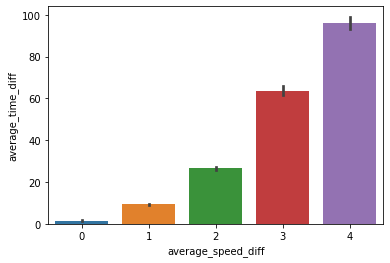

In [12]:
seaborn.barplot(x='average_speed_diff', y='average_time_diff', data=training_data)

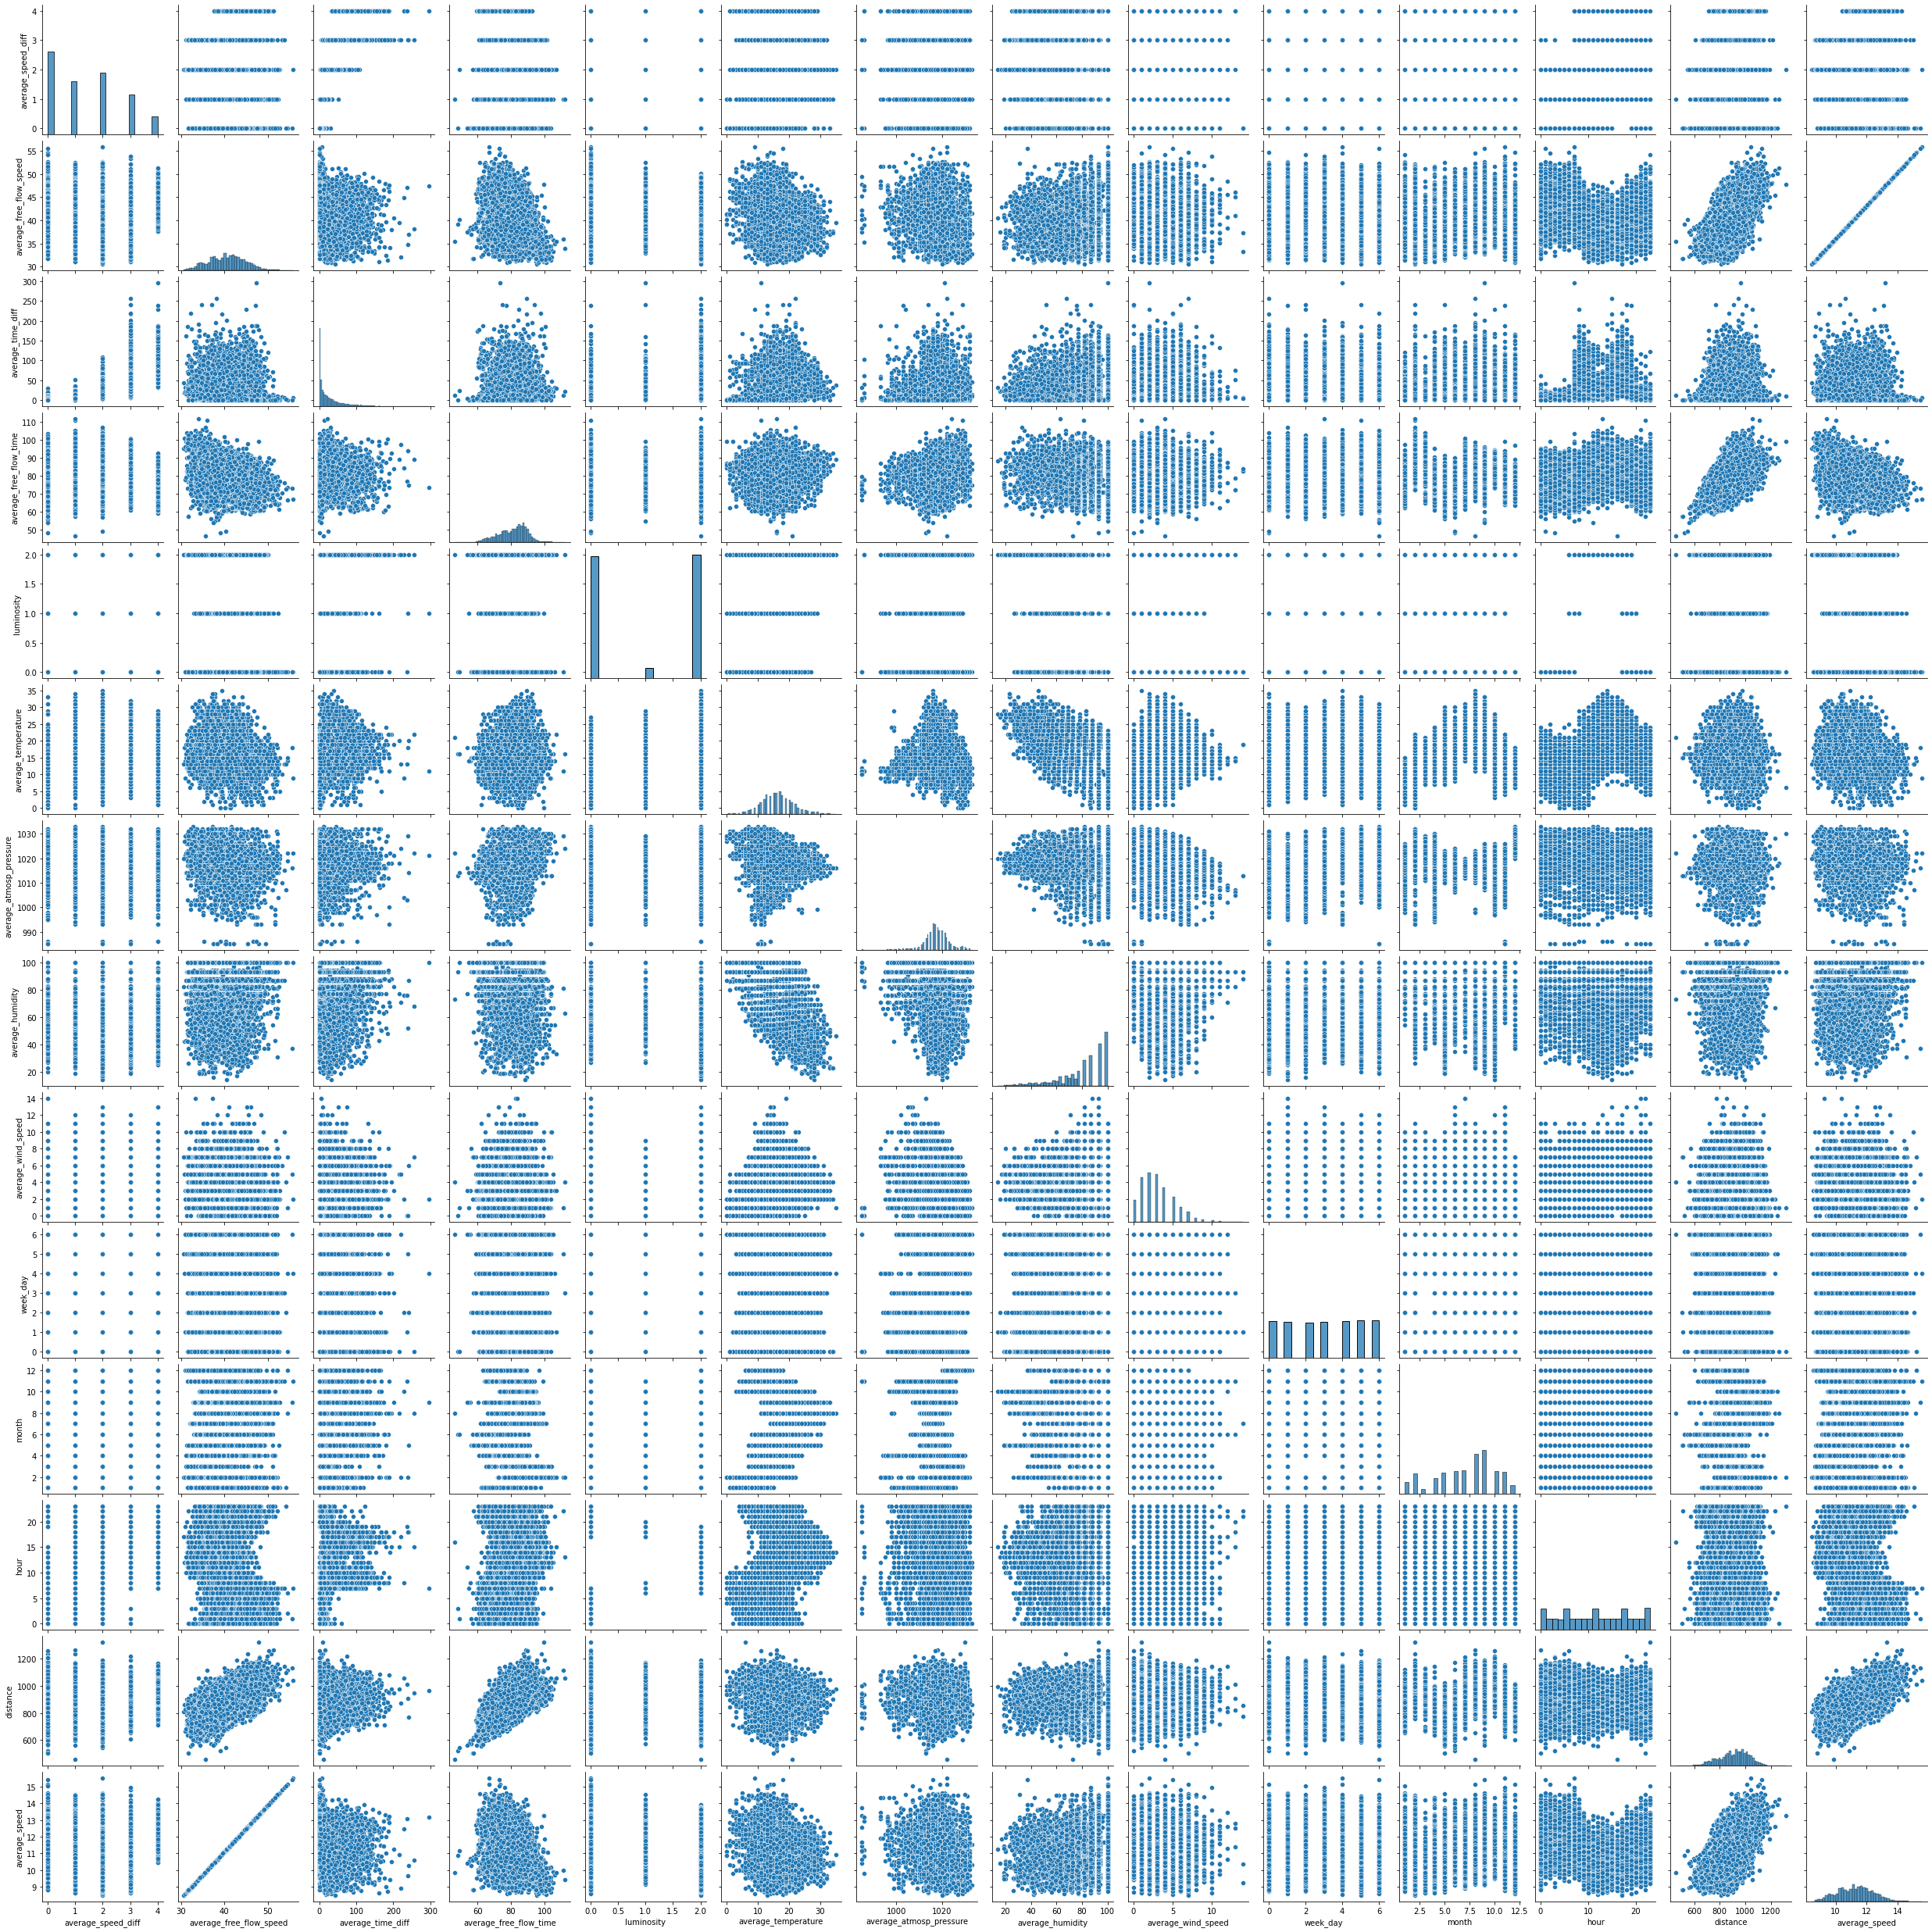

In [13]:
seaborn.pairplot(training_data)

<AxesSubplot:>

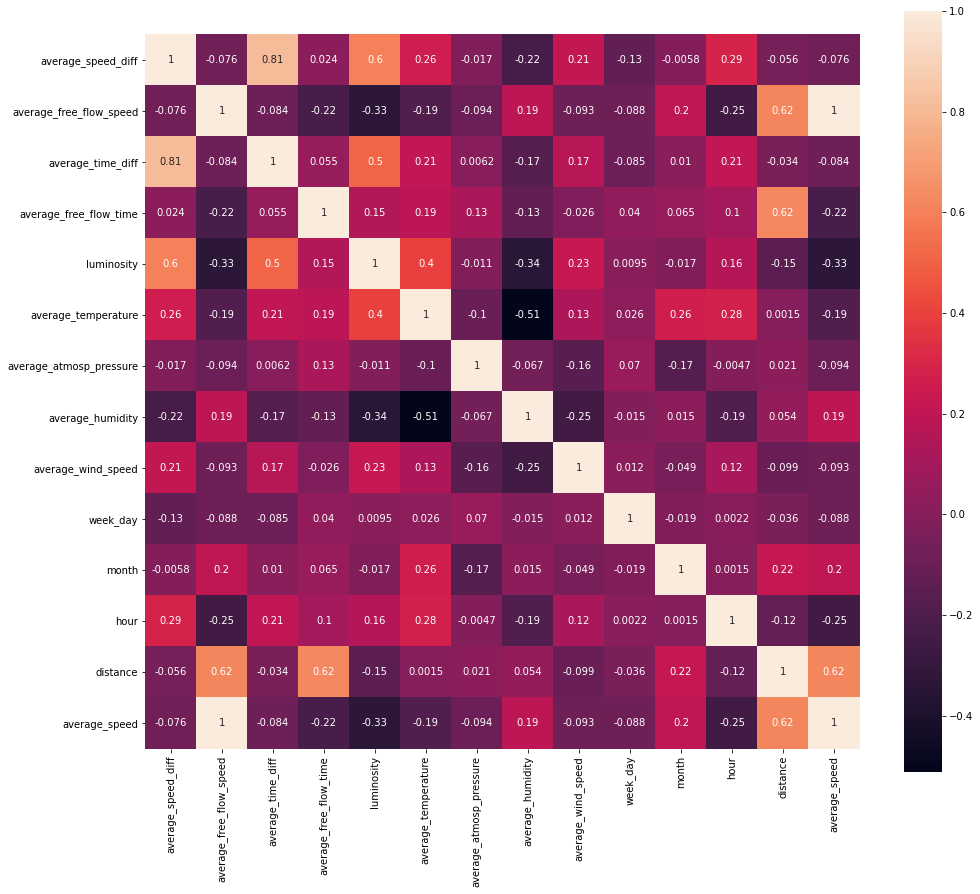

In [14]:
correlations = training_data.corr()
f,ax = pyplot.subplots(figsize = (16,14))
seaborn.heatmap(correlations, vmax=1, square=True, annot=True)

In [15]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.preprocessing import MinMaxScaler

seed_r = 2021

# define our x and y
x = training_data.drop('average_speed_diff', axis=1)
y = training_data[['average_speed_diff']]

# scale the data
x_scaler = MinMaxScaler(feature_range=(0, 1)).fit(x)
y_scaler = MinMaxScaler(feature_range=(0, 1)).fit(y)


x_scaled = pandas.DataFrame(x_scaler.transform(x[x.columns]), columns=x.columns)
y_scaled = pandas.DataFrame(y_scaler.transform(y[y.columns]), columns=y.columns)

In [16]:
x_scaled.head()

,average_free_flow_speed,average_time_diff,average_free_flow_time,luminosity,average_temperature,average_atmosp_pressure,average_humidity,average_wind_speed,week_day,month,hour,distance,average_speed
0,0.433071,0.038786,0.381098,1.0,0.428571,0.708333,1.000000,0.214286,0.500000,0.636364,0.304348,0.423920,0.433071
1,0.440945,0.162901,0.625000,1.0,0.600000,0.750000,0.453488,0.357143,0.666667,0.636364,0.608696,0.643461,0.440945
2,0.318898,0.129511,0.591463,1.0,0.742857,0.604167,0.546512,0.285714,1.000000,0.727273,0.695652,0.528820,0.318898
3,0.271654,0.205734,0.727134,1.0,0.514286,0.833333,0.395349,0.285714,0.166667,0.090909,0.478261,0.603115,0.271654
4,0.437008,0.169983,0.466463,1.0,0.428571,0.479167,0.790698,0.714286,0.500000,0.454545,0.521739,0.501269,0.437008


In [17]:
y_scaled.head()

,average_speed_diff
0,0.50
1,0.75
2,0.75
3,0.75
4,0.50


In [18]:
def build_model(activation='relu', learning_rates=0.01):
    model = Sequential()
    model.add(Dense(14, input_dim=13, activation=activation))
    model.add(Dense(9, activation=activation))
    model.add(Dense(9, activation=activation))
    model.add(Dense(9, activation=activation))
    model.add(Dense(1, activation='relu'))

    model.compile(
        loss='mae',
        optimizer= tensorflow.optimizers.Adam(learning_rates),
        metrics=['mae','mse']
    )

    return model

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_scaled, test_size=0.2, random_state=2022)

TUNING_DICT = {
    'activation':['relu','sigmoid'],
    'learning_rates':[0.01, 0.001]
}

kf = KFold(n_splits=5, shuffle=True, random_state=2022)

model = KerasRegressor(build_fn=build_model, epochs=20, batch_size=32)
grid_search = GridSearchCV(estimator=model, param_grid=TUNING_DICT, cv = kf, scoring='neg_mean_absolute_error', refit='True', verbose=1)
grid_search.fit(x_train, y_train, validation_split=0.2, verbose=1)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Epoch 1/20
109/109 [==============================] - 0s 3ms/step - loss: 0.1658 - mae: 0.1658 - mse: 0.0555 - val_loss: 0.1241 - val_mae: 0.1241 - val_mse: 0.0329
Epoch 2/20
109/109 [==============================] - 0s 1ms/step - loss: 0.1242 - mae: 0.1242 - mse: 0.0303 - val_loss: 0.1106 - val_mae: 0.1106 - val_mse: 0.0240
Epoch 3/20
109/109 [==============================] - 0s 1ms/step - loss: 0.1239 - mae: 0.1239 - mse: 0.0315 - val_loss: 0.1031 - val_mae: 0.1031 - val_mse: 0.0206
Epoch 4/20
109/109 [==============================] - 0s 1ms/step - loss: 0.1006 - mae: 0.1006 - mse: 0.0219 - val_loss: 0.0890 - val_mae: 0.0890 - val_mse: 0.0179
Epoch 5/20
109/109 [==============================] - 0s 1ms/step - loss: 0.0905 - mae: 0.0905 - mse: 0.0175 - val_loss: 0.0831 - val_mae: 0.0831 - val_mse: 0.0152
Epoch 6/20
109/109 [==============================] - 0s 1ms/step - loss: 0.0941 - mae: 0.0941 - mse: 0.0195 - val_loss:

GridSearchCV(cv=KFold(n_splits=5, random_state=2022, shuffle=True),
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x00000284A44C3E20>,
             param_grid={'activation': ['relu', 'sigmoid'],
                         'learning_rates': [0.01, 0.001]},
             refit='True', scoring='neg_mean_absolute_error', verbose=1)

In [20]:
print("%f %s", grid_search.best_score_, grid_search.best_params_)
means = grid_search.cv_results_['mean_test_score']
stdev = grid_search.cv_results_['std_test_score']
param = grid_search.cv_results_['params']

for x,y,z in zip(means, stdev, param):
    print(x,y,z)

%f %s -0.14214100232697055 {'activation': 'relu', 'learning_rates': 0.001}
-0.19347207294664853 0.13574701875519535 {'activation': 'relu', 'learning_rates': 0.01}
-0.14214100232697055 0.11252623791020744 {'activation': 'relu', 'learning_rates': 0.001}
-0.1898147936388227 0.136702426286785 {'activation': 'sigmoid', 'learning_rates': 0.01}
-0.26434578636138867 0.12492840083081148 {'activation': 'sigmoid', 'learning_rates': 0.001}


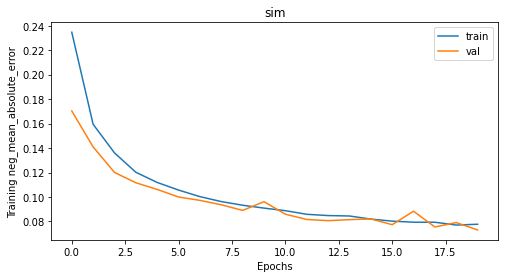

In [21]:
best_mlp_model = grid_search.best_estimator_

def plot_learning_curve(history, metric='neg_mean_absolute_error'):
    pyplot.figure(figsize=(8,4))
    pyplot.title('sim')
    pyplot.plot(history.epoch, history.history['loss'], label='train')
    pyplot.plot(history.epoch, history.history['val_loss'], label='val')
    pyplot.ylabel('Training ' + metric)
    pyplot.xlabel('Epochs')
    pyplot.legend()

plot_learning_curve(best_mlp_model.model.history, metric='neg_mean_absolute_error')


In [22]:
predictions = best_mlp_model.predict(x_test)
preds = predictions.reshape(predictions.shape[0], 1)

unsc = y_scaler.inverse_transform(preds)

unique, counts = numpy.unique(unsc, return_counts=True)

print(numpy.asarray((unique, counts)).T)

[[0.00000000e+00 3.34000000e+02]
 [1.36645138e-03 1.00000000e+00]
 [1.97140872e-03 1.00000000e+00]
 ...
 [4.16281509e+00 1.00000000e+00]
 [4.21414328e+00 1.00000000e+00]
 [4.31776619e+00 1.00000000e+00]]


In [23]:
# Load the test data
test_data = TrafficData.process('test_data.csv', 'iso-8859-1')


# scale the data
test_scaler = MinMaxScaler(feature_range=(0, 1)).fit(test_data)

#
test_scaled = pandas.DataFrame(test_scaler.transform(test_data[test_data.columns]), columns=test_data.columns)

test_predictions = best_mlp_model.predict(test_scaled)
test_preds = test_predictions.reshape(test_predictions.shape[0], 1)
unscaled = y_scaler.inverse_transform(test_preds)


In [24]:
# RowId,Speed_Diff
file = open("submission_1.csv", 'w')
file.write('RowId,Speed_Diff\n')

my_dict = {0: 'None', 1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very_High'}
lfn = lambda x: my_dict.get(round(x[0]))
pred_readable = numpy.array(list(map(lfn, unscaled)))

dataframe = pandas.DataFrame(data=pred_readable.astype(str))

# Fix the column name
dataframe = dataframe.rename(columns={0: 'Speed_Diff'})

# Index should start at 1 for some wild reason
dataframe.index += 1

# print it out to csv.
dataframe.to_csv('submission_1.csv', sep=',', header=True, index=True, index_label='RowId')